Counting patterns in the genome

In [35]:
from collections import Counter
from Bio import SeqIO
from collections import defaultdict
import itertools
import time
import re
import matplotlib.pyplot as plt

    PatternCount(Text, Pattern)
        count ← 0
        for i ← 0 to |Text| − |Pattern|
            if Text(i, |Pattern|) = Pattern
                count ← count + 1
        return count

In [34]:
seq_record = SeqIO.read("vibrio_cholera.fasta", "fasta") # GenBank ID: CP033513.1
vibrio_genome = str(seq_record.seq)
print(vibrio_genome[:100])

TGCAGTTGAAACCTTTGTTCACTCTTCTTCCTGTCGTTTTGAGTAGTGTCGTTCAAGCACAAGAGAATACCGAGCAAGCCGTCGATGAAACCGTTACGGT


In [3]:
def pattern_count(sequence, pattern):
    '''Return the count the input pattern found in to a give string.'''
    count = 0
    for i in range(0, len(sequence) - len(pattern) + 1):
        if sequence[i:i+len(pattern)] == pattern:
            count = count + 1
    return count

In [4]:
pattern = 'ATGATCAAG'
sequence = vibrio_genome
pat_c = pattern_count(sequence, pattern)
print(pat_c)

18


In [4]:
#faster

def pattern_counter(sequence, pattern):
    '''Return the count the input pattern found in to a give string.'''
    return Counter([sequence[i:i+len(pattern)] for i in range(len(sequence)-len(pattern) + 1) 
                    if sequence[i:i+len(pattern)] == pattern])



In [5]:
pattern = 'ATGATCAAG'
sequence = vibrio_genome

pat = pattern_counter(sequence, pattern)
for pattern, count in pat.items():
    print(pattern)
    print(count)
    
print(pat)

ATGATCAAG
18
Counter({'ATGATCAAG': 18})


In [6]:
# the ?= mark disable the capturing group, you just get the counts, else you got a 18 repetition of the pattern
#even faster
def get_pattern_count_rgx(sequence, pattern):
    '''Return the count the input pattern found in to a give string.'''
    return len(re.findall(r'(?='+pattern+')', sequence))


In [11]:
pattern = 'ATGATCAAG'
sequence = vibrio_genome
get_pattern_count_rgx(sequence, pattern)

18

In [12]:
seq = 'GATATATGCATATACTT'
pat = 'ATAT'

re.findall('('+pat+')', seq)

['ATAT', 'ATAT']

In [18]:
%timeit pattern_count(vibrio_genome, 'ATGATCAAG')

143 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
t0 = time.process_time()

pattern_count(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.17240540200000254


In [19]:
%timeit pattern_counter(vibrio_genome, 'ATGATCAAG')

150 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
t0 = time.process_time()

pattern_counter(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.1559621719999953


In [21]:
%timeit get_pattern_count_rgx(vibrio_genome, 'ATGATCAAG')

14.3 ms ± 36.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
t0 = time.process_time()

get_pattern_count_rgx(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.025794691999998065


    FrequentWords(Text, k)
        FrequentPatterns ← an empty set
        for i ← 0 to |Text| − k
            Pattern ← the k-mer Text(i, k)
            Count(i) ← PatternCount(Text, Pattern)
        maxCount ← maximum value in array Count
        for i ← 0 to |Text| − k
            if Count(i) = maxCount
                add Text(i, k) to FrequentPatterns
        remove duplicates from FrequentPatterns
        return FrequentPatterns

In [7]:
#eternity for vibrio genome

def frequent_patterns(sequence, k):
    frequent_pats = defaultdict(int)
    for i in range(len(sequence) - k + 1):
        pattern = sequence[i:i+k]
        frequent_pats[pattern] = frequent_pats.get(pattern, 0) + 1
        maxval = max(frequent_pats.values())
    return [k for k, v in frequent_pats.items() if v == maxval], maxval, frequent_pats


In [14]:
sequence = 'ATACGATATATATCCATAGATA'

#%timeit frequentWords(sequence, 3)

pat, count, d = frequent_patterns(sequence, 3)
print(pat)
print(count)
print(d)

['ATA']
6
defaultdict(<class 'int'>, {'ATA': 6, 'TAC': 1, 'ACG': 1, 'CGA': 1, 'GAT': 2, 'TAT': 3, 'ATC': 1, 'TCC': 1, 'CCA': 1, 'CAT': 1, 'TAG': 1, 'AGA': 1})


In [29]:
# toooooooo slowwwwwwwwww = ctrl + c  8(

t0 = time.process_time()

frequent_patterns(vibrio_genome, 9)

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

KeyboardInterrupt: 

In [8]:
def most_frequent_patterns(sequence, k, n=1):
    """Returns the n most frequent patterns of lenght k from a input
    sequence."""
    return Counter([sequence[i:i+k] for i in range(len(sequence) - k + 1)]).most_common(n)
           

In [16]:
t0 = time.process_time()

most_frequent_patterns(vibrio_genome, 9, 5)

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.3727863949999999


In [17]:
#tests

t1= 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
print(most_frequent_patterns(t1, 4, 2))

t2 = 'TGGTAGCGACGTTGGTCCCGCCGCTTGAGAATCTGGATGAACATAAGCTCCCACTTGGCTTATT\
CAGAGAACTGGTCAACACTTGTCTCTCCCAGCCAGGTCTGACCACCGGGCAACTTTTAGAGCACTATCGTGGTACAAATAATGCTGCCAC'
print(most_frequent_patterns(t2, 3, 1))

t3 = 'CAGTGGCAGATGACATTTTGCTGGTCGACTGGTTACAACAACGCCTGGGGCTTTTGAGCAACGA\
GACTTTTCAATGTTGCACCGTTTGCTGCATGATATTGAAAACAATATCACCAAATAAATAACGC\
CTTAGTAAGTAGCTTTT'
print(most_frequent_patterns(t3, 4, 1))

t4 = 'ATACAATTACAGTCTGGAACCGGATGAACTGGCCGCAGGTTAACAACAGAGTTGCCAGGCACTG\
CCGCTGACCAGCAACAACAACAATGACTTTGACGCGAAGGGGATGGCATGAGCGAACTGATCGT\
CAGCCGTCAGCAACGAGTATTGTTGCTGACCCTTAACAATCCCGCCGCACGTAATGCGCTAACT\
AATGCCCTGCTG'
print(most_frequent_patterns(t4, 5, 1))

t5 = 'CCAGCGGGGGTTGATGCTCTGGGGGTCACAAGATTGCATTTTTATGGGGTTGCAAAAATGTTTT\
TTACGGCAGATTCATTTAAAATGCCCACTGGCTGGAGACATAGCCCGGATGCGCGTCTTTTACA\
ACGTATTGCGGGGTAAAATCGTAGATGTTTTAAAATAGGCGTAAC'
print(most_frequent_patterns(t5, 5, 3))

[('GCAT', 3), ('CATG', 3)]
[('TGG', 6)]
[('TTTT', 4)]
[('AACAA', 5)]
[('GGGGT', 4), ('TTTTA', 4), ('AAAAT', 4)]


In [18]:
sequence = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
patterns = most_frequent_patterns(sequence, 4, 2)
for pat, count in patterns:
    print(pat, end=' ')

GCAT CATG 

In [19]:
# code grade coursera CACTACGTGTG

with open('dataset_2_10.txt') as f:
    sequence = f.readline()
    number = int(f.readline())
    
patterns = most_frequent_patterns(sequence, number)
for pat, count in patterns:
    print(pat)

CACTACGTGTG


In [7]:
oriCVibrio = 'atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac\
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca\
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt\
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt\
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga\
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat\
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag\
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt\
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc'

#patterns_vibrio = most_frequent_patterns(oriCVibrio.upper(), 9, 5)
#print(patterns_vibrio)

In [21]:
patterns_vibrio = most_frequent_patterns(oriCVibrio.upper()[::-1], 9, 5)
print(patterns_vibrio)

[('TACTAGTTC', 3), ('ACTAGTTCT', 3), ('CTAGTTCTC', 3), ('GAACTAGTA', 3), ('GCTACTAGT', 2)]


In [22]:
sequence = vibrio_genome
most_frequent_patterns(sequence, 9)

[('TAACGCCCG', 125)]

In [23]:
oriC_start = 535819
oriC_vibrio = vibrio_genome[oriC_start:oriC_start + 540]
most_frequent_patterns(oriC_vibrio, 9)

[('ATGATCAAG', 3)]

In [36]:
# faster
def reverse_complement_str(sequence):
    reverse = str.maketrans("ACGT","TGCA")
    return sequence.translate(reverse)[::-1]

In [37]:
def reverse_complement(sequence):
    """Receive a sequence string as input and returns
    the revese complement."""
    sequence = sequence.upper()
    return ''.join([{'A':'T','C':'G','G':'C','T':'A'}[nuc] for nuc in reversed(sequence)])

In [245]:
%timeit reverse_complement(oriCVibrio.upper())

76.5 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
t0 = time.process_time()

reverse_complement_str(vibrio_genome)

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.003514449999999947


In [246]:
%timeit reverse_complement_str(oriCVibrio.upper())

1.87 µs ± 79.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
t0 = time.process_time()

reverse_complement(vibrio_genome)

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.1390458360000002


In [11]:
#tests
s = 'AAAACCCGGT' # ACCGGGTTTT
s1 = 'ACACAC' # GTGTGT

print(reverse_complement(s))
print(reverse_complement(s1))
print(reverse_complement_str(s))
print(reverse_complement_str(s1))

ACCGGGTTTT
GTGTGT
ACCGGGTTTT
GTGTGT


Solve the Pattern Matching Problem.

    Input: Two strings, Pattern and Genome.
    Output: A collection of space-separated integers specifying all starting positions where Pattern appears as a substring of Genome.

In [38]:
# just one ajust in pattern_count

def pattern_locations(sequence, pattern):
    matches = []
    n = len(sequence)
    m = len(pattern)
    for i in range(n - m + 1):
        if pattern == sequence[i:i+m]:
            matches.append(i)
    return matches

In [37]:
pat = 'ATAT'
seq = 'GATATATGCATATACTT'
locations = pattern_locations(seq, pat)
for loc in locations:
    print(loc, end = ' ')

1 3 9 

In [43]:
rgx = re.finditer('('+pattern+')', sequence)
for rg in rgx:
    print(rg.span()[0])

480
23111
82158
150128
198993
208106
295923
500498
533288
535846
535946
536327
570123
578209
584009
608450
691622
863619


In [39]:
def get_pattern_starpos_rgx(sequence, pattern):
    """ Return a list of start positions of the matched pattern in the string"""
    return [match.start() for match in re.finditer(r'(?='+pattern+')', sequence)]

In [34]:
pat = 'ATAT'
seq = 'GATATATGCATATACTT'
get_pattern_starpos_rgx(seq, pat)

[1, 3, 9]

In [38]:
t0 = time.process_time()

pattern_locations(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.1357695699999999


In [39]:
t0 = time.process_time()

get_pattern_starpos_rgx(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.02378334300000029


In [40]:
def get_pattern_positions_rgx(sequence, pattern):
    return [pos.span()[0] for pos in re.finditer(r'('+pattern+')', sequence)]


In [41]:
def pattern_positions(sequence, pattern):
    """ returns the position of all k-mers in sequence as a dictionary
    Autor: Leonard McMillan """
    k_positions = {}
    for i in range(len(sequence) - len(pattern) + 1):
        kmer = sequence[i:i+len(pattern)]
        k_positions[kmer] = k_positions.get(kmer,[])+[i]
    # combine kmers with their reverse complements
    k_pair_position = {}
    for kmer, pos in k_positions.items():
        k_rev = reverse_complement_str(kmer)
        if (kmer == k_rev):
            k_pair_position[kmer] = pos
        elif (kmer <= k_rev):
            k_pair_position[kmer] = sorted(pos + k_positions.get(k_rev, []))
        elif (k_rev < kmer):
            k_pair_position[k_rev] = sorted(k_positions.get(k_rev, []) + pos)
    return k_pair_position

In [41]:
pat = 'ATAT'
seq = 'GATATATGCATATACTT'

locations = pattern_positions(seq, pat)

for p, loc in locations.items():
    if p == pat:
        print(loc)

[1, 3, 9]


In [42]:
t0 = time.process_time()

pattern_positions(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

2.478380733


In [15]:
def get_pattern_positions_rgx_yield(sequence, pattern):
    """ Yield a list of start positions of the matched pattern in the string"""
    positions = re.finditer(r'('+pattern+')', sequence)
    for position in positions:
        pos_lst =  position.span()[0]
        yield pos_lst

In [46]:
k_pos = get_pattern_positions_rgx_yield(vibrio_genome, 'ATGATCAAG')

for pos in k_pos:
    print(pos)

480
23111
82158
150128
198993
208106
295923
500498
533288
535846
535946
536327
570123
578209
584009
608450
691622
863619


In [47]:
t0 = time.process_time()

get_pattern_positions_rgx_yield(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.00014790799999975235


In [49]:
t0 = time.process_time()

get_pattern_starpos_rgx(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.029146146999999623


In [42]:
def get_pattern_positions_rgx_generator(sequence, pattern):
    """ Return a list of start positions of the matched pattern in the string"""
    return (pos.span()[0] for pos in re.finditer(r'('+pattern+')', sequence))


In [51]:
seq = 'GATATATGCATATACTT'
pat = 'ATAT'
positions = get_pattern_positions_rgx_generator(sequence, pattern)
for pos in positions:
    print(pos)

480
23111
82158
150128
198993
208106
295923
500498
533288
535846
535946
536327
570123
578209
584009
608450
691622
863619


In [52]:
t0 = time.process_time()

get_pattern_positions_rgx_generator(vibrio_genome, 'ATGATCAAG')

t1 = time.process_time()
cpu_time = t1 - t0
print(cpu_time)

0.0001347830000000272


In [53]:
pos_generator = get_pattern_positions_rgx_generator(vibrio_genome, 'ATGATCAAG')
for pos in pos_generator:
    print(pos)

480
23111
82158
150128
198993
208106
295923
500498
533288
535846
535946
536327
570123
578209
584009
608450
691622
863619


In [125]:
#tests function pattern_locations
#
p1 = 'ACAC'
s1 = 'TTTTACACTTTTTTGTGTAAAAA' # 4

print('First test')
print(pattern_locations(s1, p1))
locations = pattern_positions(s1, p1) # gets the reverse
for p, loc in locations.items():
    if p == p1:
        print(loc)
        
# s dataset checks for off-by-one errors at the beginning of Genome
p2 = 'AAA'
s2 = 'AAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAATTTTATTGAC\
TTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAATAATTACAGAGTA\
CACAACATCCAT' # 0 46 51 74

print('Second test')
print(pattern_locations(s2, p2))

locations1 = pattern_positions(s2, p2) # gets the reverse
for p, loc in locations1.items():
    if p == p2:
        print(loc)


# dataset checks for off-by-one errors at the endof Genome
p3 = 'TTT'
s3 = 'AGCGTGCCGAAATATGCCGCCAGACCTGCTGCGGTGGCCTCGCCGACTTCACGGATGCCAAGTG\
CATAGAGGAAGCGAGCAAAGGTGGTTTCTTTCGCTTTATCCAGCGCGTTAACCACGTTCTGTGC\
CGACTTT'  # 88 92 98 132

print('Third test')
print(pattern_locations(s3, p3))
locations2 = pattern_positions(s3, p3) # gets the reverse
for p, loc in locations2.items():
    if p == reverse_complement(p3):
        print(loc)


# overlapings
p4 = 'ATA'
s4 = 'ATATATA' # 0 2 4

print('Fourth test')
print(pattern_locations(s4, p4))
locations3 = pattern_positions(s4, p4) # gets the reverse
for p, loc in locations3.items():
    if p == p4:
        print(loc)

First test
[4]
[4, 14]
Second test
[0, 46, 51, 74]
[0, 46, 51, 54, 55, 74, 80]
Third test
[88, 92, 98, 132]
[9, 80, 88, 92, 98, 132]
Fourth test
[0, 2, 4]
[0, 1, 2, 3, 4]


In [54]:
# coursera code grade
# 116556, 149355, 151913, 152013, 152394, 186189, 194276, 200076, 224527, 
# 307692, 479770, 610980, 653338, 679985, 768828, 878903, 985368
with open('Vibrio_cholerae.txt') as f:
    seq = f.read()
v_DNAA = 'ATGATCAAG' 

#ccode version one
print(sorted(pattern_locations(seq, 'ATGATCAAG')))

[116556, 149355, 151913, 152013, 152394, 186189, 194276, 200076, 224527, 307692, 479770, 610980, 653338, 679985, 768828, 878903, 985368]


In [55]:
vdnaAloc = pattern_positions(seq, v_DNAA)
for pat, loc in vdnaAloc.items():
    if pat == v_DNAA:
        print(loc)

[60039, 98409, 116556, 129189, 149355, 151913, 152013, 152283, 152354, 152394, 152411, 163207, 186189, 194276, 197028, 200076, 200160, 224527, 307692, 357976, 376771, 392723, 479770, 532935, 600085, 610980, 622755, 653338, 679985, 768828, 878903, 985368, 1065555]


In [5]:
oriCThermoga = 'aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactga\
aactaaaatggtaggtttggtggtaggttttgtgtacattttgtagtatctgatttttaa\
ttacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaa\
acaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggttt\
ctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattca\
agattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtat\
ccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggta\
agttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaa\
cctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctga'

In [58]:
thermoga = most_frequent_patterns(oriCThermoga.upper(), 9, 6)
print(thermoga)

# AACCTACCA   AAACCTACC   ACCTACCAC CCTACCACC   GGTAGGTTT   TGGTAGGTT

[('ACCTACCAC', 5), ('TGGTAGGTT', 3), ('GGTAGGTTT', 3), ('AAACCTACC', 3), ('AACCTACCA', 3), ('CCTACCACC', 3)]


The Frequency Array

    ComputingFrequencies(Text, k)
            for i ← 0 to 4k − 1
                FrequencyArray(i) ← 0
            for i ← 0 to |Text| − k
                Pattern ← Text(i, k)
                j ← PatternToNumber(Pattern)
                FrequencyArray(j) ← FrequencyArray(j) + 1
            return FrequencyArray

    PATTERNTONUMBER(Pattern)
        if Pattern contains no symbols
            return 0
        symbol LASTSYMBOL(Pattern)
        Prefix PREFIX(Pattern)
        return 4 · PATTERNTONUMBER(Prefix) + SYMBOLTONUMBER(symbol)

In [17]:
def pattern_to_numbers(pattern):
    """Returns a integer number representing the inputed 
    pattern"""
    k = len(pattern)
    base_index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    number= 0
    for i in range(k):
        number += base_index[pattern[i]]*4**(k-i-1)
    return number


In [18]:
def kmers(seq, k):
    """Returns a k_mer iterator"""
    return (seq[i:i+k] for i in range(len(seq)-k+1))

seq = 'ACGCGGCTCTGAAA'
k = 2
kmers = sorted(kmers(seq, k))
for kmer in kmers:
    print(kmer, end= ' ')

AA AA AC CG CG CT CT GA GC GC GG TC TG 

In [33]:
pattern = 'ATGATCAAG'
pattern_to_numbers(pattern)

58178

In [34]:
pattern_to_numbers('ATGCAA')

912

In [35]:
#test
pattern = 'CTTCTCACGTACAACAAAATC'
pattern_to_numbers(pattern)


2161555804173

In [76]:
def number_to_pattern(number, k):
    """Returns a pattern representing the inputed 
    number"""
    nts = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    if k == 1:
        return nts[number]
    prefix_idx = number // 4
    reminder = number % 4
    prefix_pattern = number_to_pattern(prefix_idx, k - 1)
    return prefix_pattern + nts[reminder]

In [62]:
number_to_pattern(5437, 7)  # CCCATTC

'CCCATTC'

In [63]:
number_to_pattern(5437, 8) # ACCCATTC

'ACCCATTC'

In [20]:
def compute_frequencies(sequence, k):
    """Returns the number of times that each k-mer Pattern has already 
    appeared in the sequence."""
    frequency_array = [0]*(4**k)
    patterns = []
    for i in range(len(sequence)- k + 1):
        pattern = sequence[i:i+k]
        patterns.append(pattern)
        j = pattern_to_numbers(pattern)
        frequency_array[j] = frequency_array[j] + 1
    return frequency_array


In [65]:
seq = 'ACGCGGCTCTGAAA'
k = 2
compute_frequencies(seq, k) # 2 1 0 0 0 0 2 2 1 2 1 0 0 1 1 0

[2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0]

In [43]:
def compute_frequency(sequence, k):
    """Returns the number of times that each k-mer Pattern has already 
    appeared in the sequence."""
    freq_array = [0] * (4**k)
    for i, val in enumerate(sequence[:len(sequence) - (k - 1)]):
        freq_array[pattern_to_numbers(sequence[i:i + k])] += 1
    return [v for v in freq_array]


In [67]:
seq = 'ACGCGGCTCTGAAA'
k = 2
compute_frequency(seq, k)

[2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0]

In [68]:
%timeit compute_frequencies(sequence, k)

1.04 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%timeit compute_frequency(seq, k)

13.1 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [70]:
start = time.process_time()
compute_frequencies(sequence, k)
end = time.process_time()
total = end - start
print(total)

1.059972235


In [71]:
start = time.process_time()
compute_frequency(seq, k)
end = time.process_time()
total1 = end - start
print(total1)

0.0002048840000021812


      FasterFrequentWords(Text, k)
            FrequentPatterns ← an empty set
            FrequencyArray ← ComputingFrequencies(Text, k)
            maxCount ← maximal value in FrequencyArray
            for i ← 0 to 4k − 1
                if FrequencyArray(i) = maxCount
                    Pattern ← NumberToPattern(i, k)
                    add Pattern to the set FrequentPatterns
            return FrequentPatterns

In [22]:
def faster_frequent_patterns(sequence, k):
    """Returns the most frequent k-mers in a string"""
    freq_pats = set()
    freq_array = compute_frequency(sequence, k)
    max_count = max(freq_array)
    for i in range(4**k -1):
        if freq_array[i] == max_count:
            pattern = number_to_pattern(i, k)
            freq_pats.add(pattern)
    return freq_pats

In [73]:
faster_frequent_patterns('ACGCGGCTCTGAAA', 2)

{'AA', 'CG', 'CT', 'GC'}

     FindingFrequentWordsBySorting(Text , k)
            FrequentPatterns ← an empty set
            for i ← 0 to |Text| − k
                Pattern ← Text(i, k)
                Index(i) ← PatternToNumber(Pattern)
                Count(i) ← 1
            SortedIndex ← Sort(Index)
            for i ← 1 to |Text| − k
                if SortedIndex(i) = SortedIndex(i − 1)
                    Count(i) = Count(i − 1) + 1
            maxCount ← maximum value in the array Count
            for i ← 0 to |Text| − k
                if Count(i) = maxCount
                    Pattern ← NumberToPattern(SortedIndex(i), k)
                    add Pattern to the set FrequentPatterns
            return FrequentPatterns

In [23]:
def get_frequent_patterns_by_sorting(sequence, k):
    """Returns the most frequent k-mers in a string"""
    freq_pats = set()
    idx = [0] * (len(sequence) - k + 1)
    count = [0] * (len(sequence) - k + 1)
    for i in range(len(sequence) - k + 1):
        pattern = sequence[i:i+k]
        idx[i] = pattern_to_numbers(pattern)
        count[i] = 1
    sorted_idx = sorted(idx)
    for i in range(len(sequence) - k + 1):
        if sorted_idx[i] == sorted_idx[i - 1]:
            count[i] = count[i - 1] + 1
    max_count = max(count)
    for i in range(len(sequence) - k + 1):
        if count[i] == max_count:
            pattern = number_to_pattern(sorted_idx[i], k)
            freq_pats.add(pattern)
    return freq_pats

In [75]:
get_frequent_patterns_by_sorting('ACGCGGCTCTGAAA', 2)

{'AA', 'CG', 'CT', 'GC'}

In [76]:
start = time.process_time()
faster_frequent_patterns(vibrio_genome, 9)
end = time.process_time()
total = end - start
print(total)

3.042381016


In [77]:
start = time.process_time()
get_frequent_patterns_by_sorting(vibrio_genome, 9)
end = time.process_time()
total = end - start
print(total)

3.511440695000001


In [78]:
# better and faster

start = time.process_time()
most_frequent_patterns(vibrio_genome, 9, 5)
end = time.process_time()
total = end - start
print(total)

0.38091594800000195


The Clump Finding Problem

    ClumpFinding(Genome, k, L, t)
            FrequentPatterns ← an empty set
            for i ← 0 to 4k − 1
                Clump(i) ← 0
            for i ← 0 to |Genome| − L
                Text ← the string of length L starting at position i in Genome 
                FrequencyArray ← ComputingFrequencies(Text, k)
                for index ← 0 to 4k − 1
                    if FrequencyArray(index) ≥ t
                        Clump(index) ← 1
            for i ← 0 to 4k − 1
                if Clump(i) = 1
                    Pattern ← NumberToPattern(i, k)
                    add Pattern to the set FrequentPatterns
            return FrequentPatterns

In [24]:
def clump_finder(sequence, k, window, times):
    """Returns the number of the times the clumps of patterns of k length appears in a sliding window
    inside a inputed sequence."""
    clumps = []
    for i in range(len(sequence) - window + 1):
        pattern = sequence[i:i+window]
        counts = {}
        for i in range(len(pattern) - k + 1):
            if pattern[i:i+k] not in counts:
                counts[pattern[i:i+k]] = 0
            counts[pattern[i:i+k]] += 1
        for mer in counts:
            if counts[mer] >= times and mer not in clumps:
                clumps.append(mer)
    return clumps


In [25]:
def find_pattern_clumps(sequence, k, window, times):
    """Returns the number of the times the clumps of patterns of k length appears in a sliding window
    inside a inputed sequence."""
    clumps = []
    for i in range(len(sequence) - window + 1):
        pattern = sequence[i:i+window]
        counts = {}
        for i in range(len(pattern) - k + 1):
            counts[pattern[i:i+k]] = counts.get(pattern[i:i+k], 0) + 1
        for mer in counts:
            if counts[mer] >= times and mer not in clumps:
                clumps.append(mer)
    return clumps

In [99]:
#test coursera

sequence = 'CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA'
clump_finder(sequence, 5, 50, 4) # CGACA GAAGA

['CGACA', 'GAAGA']

In [100]:
#test coursera

sequence = 'CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA'
find_pattern_clumps(sequence, 5, 50, 4) # CGACA GAAGA

['CGACA', 'GAAGA']

In [101]:
#test coursera - code grade

with open('dataset_4_5.txt') as f:
    sequence = f.readline()


'''answer = ATCCGGTGAG ATGACACTGC CAATAAACCA TTGCAACCGA GGCATATACC TCGCTCTGTA TTTGATGGGG 
            CGATACCTCT GGCGACAGCG GCGACAGCGG CGACAGCGGG GACAGCGGGC ACAGCGGGCG CAGCGGGCGA 
            AGCGGGCGAC GCGGGCGACA CGGGCGACAG GGGCGACAGC'''

clump_finder(sequence, 10, 527, 20)

['ATCCGGTGAG',
 'ATGACACTGC',
 'CAATAAACCA',
 'TTGCAACCGA',
 'GGCATATACC',
 'TCGCTCTGTA',
 'TTTGATGGGG',
 'CGATACCTCT',
 'GGCGACAGCG',
 'GCGACAGCGG',
 'CGACAGCGGG',
 'GACAGCGGGC',
 'ACAGCGGGCG',
 'CAGCGGGCGA',
 'AGCGGGCGAC',
 'GCGGGCGACA',
 'CGGGCGACAG',
 'GGGCGACAGC']

In [102]:
#test coursera - code grade

with open('dataset_4_5.txt') as f:
    sequence = f.readline()


'''answer = ATCCGGTGAG ATGACACTGC CAATAAACCA TTGCAACCGA GGCATATACC TCGCTCTGTA TTTGATGGGG 
            CGATACCTCT GGCGACAGCG GCGACAGCGG CGACAGCGGG GACAGCGGGC ACAGCGGGCG CAGCGGGCGA 
            AGCGGGCGAC GCGGGCGACA CGGGCGACAG GGGCGACAGC'''

find_pattern_clumps(sequence, 10, 527, 20)

['ATCCGGTGAG',
 'ATGACACTGC',
 'CAATAAACCA',
 'TTGCAACCGA',
 'GGCATATACC',
 'TCGCTCTGTA',
 'TTTGATGGGG',
 'CGATACCTCT',
 'GGCGACAGCG',
 'GCGACAGCGG',
 'CGACAGCGGG',
 'GACAGCGGGC',
 'ACAGCGGGCG',
 'CAGCGGGCGA',
 'AGCGGGCGAC',
 'GCGGGCGACA',
 'CGGGCGACAG',
 'GGGCGACAGC']

In [104]:
seq_record = SeqIO.read("EColi.fasta", "fasta") # GenBank ID: 
ecoli_genome = str(seq_record.seq)
#print(ecoli_genome[:100])

len(clump_finder(ecoli_genome, 9, 500, 3)) # 1904

1904

In [106]:
len(find_pattern_clumps(ecoli_genome, 9, 500, 3))

1904

    BetterClumpFinding(Genome, k, t, L)
            FrequentPatterns ← an empty set
            for i ← 0 to 4k − 1
                Clump(i) ← 0
            Text ← Genome(0, L)
            FrequencyArray ← ComputingFrequencies(Text, k)
            for i ← 0 to 4k − 1
                if FrequencyArray(i) ≥ t
                    Clump(i) ← 1
            for i ← 1 to |Genome| − L
                FirstPattern ← Genome(i − 1, k)
                index ← PatternToNumber(FirstPattern)
                FrequencyArray(index) ← FrequencyArray(index) − 1
                LastPattern ← Genome(i + L − k, k)
                index ← PatternToNumber(LastPattern)
                FrequencyArray(index) ← FrequencyArray(index) + 1
                if FrequencyArray(index) ≥ t
                    Clump(index) ← 1
            for i ← 0 to 4k − 1
                if Clump(i) = 1
                    Pattern ← NumberToPattern(i, k)
                    add Pattern to the set FrequentPatterns
            return FrequentPatterns

In [32]:
def better_clump_finder(sequence, k, window_size, num_timest):
    """Returns the number of the times the clumps of patterns of k 
    length appears in a sliding window
    inside a inputed sequence."""
    freq_patterns = []
    clumps = []
    for i in range(4 ** k):
        clumps.append(0)
    window = sequence[0:window_size]
    freq = compute_frequency(window, k)
    for i in range(4 ** k):
        if freq[i] >= num_timestt:
            clumps[i] = 1
    for i in range(1, len(sequence) - window_size):
        first_pat = sequence[i-1:i-1+k]
        index = pattern_to_numbers(first_pat)
        freq[index] = freq[index] - 1
        last_pat = sequence[i+window_siz-k:i+window_size]
        index = pattern_to_numbers(last_pat)
        freq[index] = freq[index] + 1
        if freq[index] >= num_timest:
            clumps[index] = 1
    for i in range(4**k):
        if clumps[i] == 1:
            pat = number_to_pattern(i, k)
            freq_patterns.append(pat)
    return freq_patterns

In [33]:
print(len(better_clump_finder(ecoli_genome, 9, 500, 3)))

NameError: name 'ecoli_genome' is not defined

In [27]:
def get_base_compostion_stats(sequence, start):
    """Returns basics statistics from a sequence in itś forward and
    revese strands. Autor: Leonard McMillan"""
    half_genome = len(sequence)//2
    ter_C = start + half_genome
    if (ter_C > len(sequence)): # handle genome's circular nature
        ter_C = ter_C - len(sequence) + 1
    stats = {}
    for base in "ACGT":
        total = sequence.count(base)
        if (ter_C > start):                                   # case 1: ----start========ter---->
            forward_count = sequence[start:ter_C].count(base)
            reverse_count = total - forward_count
        else:                                                # case 2: ====ter--------start====>
            reverse_count = sequence[ter_C:start].count(base)
            forward_count = total - reverse_count
        stats[base] = (total, forward_count, reverse_count)
    return stats

In [109]:
seq_record = SeqIO.read("EColi.fasta", "fasta") # GenBank ID: 
ecoli_genome = str(seq_record.seq)

E_oriC_start = 4597344
E_ori_offset = 278         # offset to the middle of OriC
E_start = E_oriC_start + E_ori_offset

ecoli = get_base_compostion_stats(ecoli_genome, E_start)
print('\tTotal'+'\t'+'Forward'+'\t'+'Reverse'+'\t'+'Diference CG compostion')
for base in "CGAT":
    total, forward_count, reverse_count = ecoli[base]
    print("{}:\t{}\t{}\t{}\t{}".format(base, total, forward_count, reverse_count, forward_count - reverse_count))

	Total	Forward	Reverse	Diference CG compostion
C:	1180091	578899	601192	-22293
G:	1177437	593925	583512	10413
A:	1142742	572428	570314	2114
T:	1141382	575575	565807	9768


In [110]:
seq_record = SeqIO.read("Thermotoga_petrophila.fasta", "fasta") # GenBank ID: CP000702.1
thermo_genoma = str(seq_record.seq)


T_oriC_start = 786685
T_ori_offset = 211          # offset to the middle of OriC
T_start = T_oriC_start + T_ori_offset

result = get_base_compostion_stats(thermo_genoma, T_start)
print('\tTotal'+'\t'+'Forward'+'\t'+'Reverse'+'\t'+'Diference CG compostion')
for base in "CGAT":
    total, forward_count, reverse_count = result[base]
    print("{}:\t{}\t{}\t{}\t{}".format(base, total, forward_count, reverse_count, forward_count - reverse_count))

	Total	Forward	Reverse	Diference CG compostion
C:	427419	207901	219518	-11617
G:	413241	211607	201634	9973
A:	491488	247525	243963	3562
T:	491363	244722	246641	-1919


In [107]:
seq_record = SeqIO.read("vibrio_cholera.fasta", "fasta") # GenBank ID: CP033513.1
vibrio_genome = str(seq_record.seq)

ori_start_v = 535819
terc_v = 270 # half oric
v_start = ori_start_v + terc_v

vibrio = get_base_compostion_stats(vibrio_genome, v_start)
print('\tTotal'+'\t'+'Forward'+'\t'+'Reverse'+'\t'+'Diference CG compostion')
for base in "CGAT":
    total, forward_count, reverse_count = vibrio[base]
    print("{}:\t{}\t{}\t{}\t{}".format(base, total, forward_count, reverse_count, forward_count - reverse_count))

	Total	Forward	Reverse	Diference CG compostion
C:	247272	119267	128005	-8738
G:	244757	130546	114211	16335
A:	277354	134653	142701	-8048
T:	277062	138757	138305	452


In [28]:
def get_sequence_skew(sequence):
    """Returns the difference between the total number of 
    occurrences of G and the total number of occurrences of C in 
    the first i elements of the sequence. """
    skew = [0]
    for idx, element in enumerate(sequence):
        if sequence[idx] == 'G':
            skew.append(skew[idx] + 1)
        elif sequence[idx] == 'C':
            skew.append(skew[idx] -1)
        else:
            skew.append(skew[idx])
    return skew

In [124]:
print(' '.join(map(str, get_sequence_skew('CATGGGCATCGGCCATACGCC')))) 
# 0 -1 -1 -1 0 1 2 1 1 1 0 1 2 1 0 0 0 0 -1 0 -1 -2

0 -1 -1 -1 0 1 2 1 1 1 0 1 2 1 0 0 0 0 -1 0 -1 -2


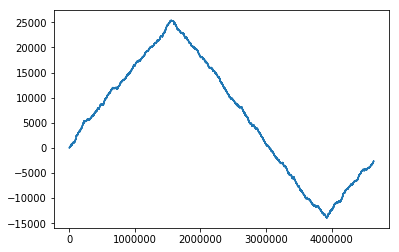

In [127]:
%matplotlib inline

coli = get_sequence_skew(ecoli_genome)

plt.plot(coli);

In [29]:
def get_minimum_skew(sequence):
    """Returns a position in a sequence minimizing the skew."""
    min_skew = []
    skew = get_sequence_skew(sequence)
    m_skew = min(skew)
    for idx in range(len(sequence) + 1):
        if skew[idx] == m_skew:
            min_skew.append(idx)
    return min_skew

In [137]:
myseq = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'
get_minimum_skew(myseq)

[11, 24]

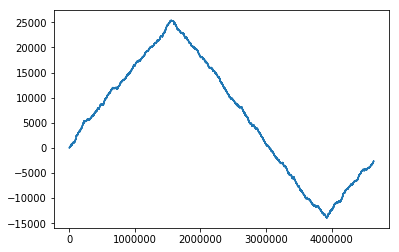

In [134]:
%matplotlib inline

coli_minskew = get_minimum_skew(ecoli_genome)

plt.plot(coli);

In [4]:
oriC_ecoli = 'aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgcataacgcggta\
tgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacc\
tgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctc\
ttattaggatcgcactgccctgtggataacaaggatccggcttttaagatcaacaacctgg\
aaaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatga\
ggggttatacacaactcaaaaactgaacaacagttgttctttggataactaccggttgatc\
caagcttcctgacagagttatccacagtagatcgcacgatctgtatacttatttgagtaaa\
ttaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgt\
tgatcttcagtg'

In [172]:
print(len(oriC_ecoli))

500


In [178]:
find_pattern_clumps(oriC_ecoli, 9, 500, 2)

['aaggatccg', 'aggatccgg']

In [183]:
most_freq_pat = most_frequent_patterns(oriC_ecoli, 9, 5)

for data in most_freq_pat:
    if data[1] >= 3:
        print(data[0])
    else:
        print('9-mers with a frequency bigger than 3 were not found.')

9-mers with a frequency bigger than 3 were not found.
9-mers with a frequency bigger than 3 were not found.
9-mers with a frequency bigger than 3 were not found.
9-mers with a frequency bigger than 3 were not found.
9-mers with a frequency bigger than 3 were not found.


In [173]:
get_pattern_starpos_rgx(ecoli_genome, oriC_ecoli.upper()) # 3923620

[3925597]

In [175]:
get_pattern_starpos_rgx(oriC_ecoli.upper(), 'ATGATCAAG')

[]

In [11]:
def hamming_distance(sequence1, sequence2):
    """Return the HD form two inputed sequences"""
    return len([(x,y) for x,y in zip(sequence1, sequence2) if x != y])

In [194]:
s1 = 'GGGCCGTTGGT'
s2 = 'GGACCGTTGAC'
hamming_distance(s1, s2)

3

In [195]:
# tests

print(hamming_distance('AAAA', 'TTTT'))  # 4

print(hamming_distance('ACGTACGT', 'TACGTACG'))  # 8

print(hamming_distance('ACGTACGT', 'CCCCCCCC'))  # 6

print(hamming_distance('ACGTACGT', 'TGCATGCA'))  # 8


sa = 'GATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACT\
AAATACT'
sb = 'AATAGCAGCTTCTCAACTGGTTACCTCGTATGAGTAAATTAGGTCATTATTGACTCAGGTCACT\
AACGTCT'  # 15
print(hamming_distance(sa, sb)) 


sc = 'AGAAACAGACCGCTATGTTCAACGATTTGTTTTATCTCGTCACCGGGATATTGCGGCCACTCAT\
CGGTCAGTTGATTACGCAGGGCGTAAATCGCCAGAATCAGGCTG'
sd = 'AGAAACCCACCGCTAAAAACAACGATTTGCGTAGTCAGGTCACCGGGATATTGCGGCCACTAAG\
GCCTTGGATGATTACGCAGAACGTATTGACCCAGAATCAGGCTC'  # 28
print(hamming_distance(sc, sd))

se = 'CCGAAGCAATTGAAACCCCCCCGGCCTGGGAGGCGCAAAAATCTGACCTCTTTGTGAGTTGACCA\
CTTAATTTATGTCTGACCACGAGAAGGGCTACTGATTTGGTACGTCGGGTCATGACCCCCAGTTCTTAGCC\
GCCTGCTCCAATCTCTGACTTGTTTATCGAGGGGATGGAGTAACGAAATGCGATTCGCCCGCTCAGGCCAA\
GGTATATATTTGAGTAGCGGAAGGTTGCACTACCTACAACCACGGCACACCGGCACGTTGTCGTGCCCTGG\
CGGCCTGCGCACTTTCGCCACTGTCAAGTACGACTTCCCAAGCTCAACCAACATTCATAATCCGGTGCAAT\
TCATACCGTATCATCGTGCTATAAGCGACGCCGATTCTCGGGGCCTGATAATTGAGACTGGACTACATAGT\
GGGTGCCCTCTCTGCGAGTAAGTGACGGAACAACGGAGATCAGGGACCAAATGGTAGCAAAACAGATCGAG\
GTACACGCAGGTAGCTGTCCGTGGAGTAGACCGCGCTTAGCGTCTGTTAGAGTATCATCGGGGTATTAGAC\
ACAGGAACCTCTATGCTGTTAAAAGGCCATACCCCGTAATTGTGCAAATTTGTTACGTTCAAATCTACGCA\
GTGAGGGTCCTAAGGTGATGGCAGGGATTGGAACTTCTCCGCTGGCTCTTAGATTACTTAGCCAGTCTACC\
CTCGAAGATACAAATCCTTCCACCAGAGGGAGCTCATTGAAATTCATTCCATGCTACTCGACCGCGCGTAT\
GGGTGCGGGGCTCTATGGGATCTAACTCGATCCTTCAGAGTCCTTATTCAAATGCATTTCCGTCCCCGTAT\
GTTTCGACGAAGCCGAAGCCCAAACCCTGGGATGGACGAATTAAGGACAGTACAGGCAATAGTGTTCTCCC\
ATACTCGGAACAGACGCCTCATTTTTTCGCGAAATCGATCTGGGTTGGAAGAAGTTCCAGTGCAGAGTTCC\
TATCACACAATTCGTTCTCGGGGCTTCCGGCCCATAAGCGATACTACTGTCTTTGCGAGCTAACGATTACA\
TTCGGGGGAACTTAGCTCGGACTGGACCAGGTACATGATCCAAAGCGCGATGTCTGTCTGTTACCCTCACCG\
CCGCTCTTTTATCGGGTA'
sf = 'GCGTAGTAGGTTCGCGTACCTAGTTCCGCCGAAAAGACAAAGGAGAAGGGAATGCTCCTAGTAGT\
TTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCAAAAAGGATTTGAACCCAAATTTTAAAGCG\
CTGATCGACAGAACGCTGTTGAAGAGGCGATGGTACTGAGATTCCCCAGAAACCACCTCCGCGCTATGTGC\
TCAAGACAACCCGCATTCGTTTTTACTAGATTTGGAGCCGAGTTGTGATTTGGATATTTTCACATAAGACC\
GAGCAGGAAATATACCTTGTTGCAGCTATTGACCCCGTTCTCTCGGAAATCCATGGAATAGTCTTCGGATA\
TTCGTACCAATGGGCGCGATGTTGCGATAAGAGAGCACATTTCATTAAGTGGTGCTCCGCCGCTAAGATG\
GGAAGGGGCGAGTCTATCGCAGCATCGAAGGCTGAGTTGGCCATTGCCGAGAGTATACATATTTACGATCA\
CACTCGCATAGTCCCACGCATTACGTCCGAGATAGTATGTCCCAATGCAACCTAAAGCCGCGAGATTCCCT\
AAGGAGAAAATTAAACACTGGAAATTAGGTGATGCTACATCCCATGGACACTTTCGGAACAATATCGGTGA\
CACACATCATCCGTGATCCCGTGATATTTCATCCATGGAGAGAGTATGGTTTTACTACACCTGGTCTAGGC\
CAAGCCTAACCCCCTGTTCATCCGTTTTATACGAGTATTACCTTGACGACCATAGAGGATAGACTCGGTAT\
CCCGCACACTCTACACACACGACTTAATCCGCTCCACGACCTTCCTAGCGATCTTTGGCGCAGCCGGTTCG\
CGTATTTTACGACCAACTCGATGGATCCCAATTATCCCCCTGGTAGTGCCCCTCCGCCTGAGAATTCGACG\
GGCGAGGTCCGGGGGACCGACATAGAGTGGAATGCTTCTTTCCGGGATAACACGTGATTGACATAAAAATG\
TAGGGCAGATAGGCATCGTTAGCACCTCTCTCCTTGCTGCACTGCGTTTATCGATCGAATTCAAGACTTGT\
GCATGTTGAAAACAACCTCGCGTTATCCCTGCTATTTGCTTCAGAGCCGTAGGAGGGGACCATGCGTGAGT\
CCTCCTGAGCAACCTCAATT'
print(hamming_distance(se, sf))  # 844

4
8
6
8
15
28
844


In [31]:
def pattern_with_mismatches_finder(sequence, pattern, distance):
    """Return list of positions of the pattern with hamming distance d from one input sequence."""
    positions = []
    count = 0
    for i in range(len(sequence) -  len(pattern) + 1):
        pat = sequence[i:i+len(pattern)]
        if hamming_distance(pattern, pat)<= distance:
            count += 1
            positions.append(i)
    return positions

In [108]:
start = time.process_time()
pattern_with_mismatches_finder(vibrio_genome, 'ATCCGGTGAG', 2)
end = time.process_time()
total = end - start
print(total)

1.3210826490000045


In [10]:
def hamming_pattern_count(sequence, pattern, distance):
    """Return the number of times the pattern with hamming distance d is found 
    in the inputed sequence."""
    return len([i for i in range(len(sequence) - len(pattern) + 1) if 
                hamming_distance(sequence[i:i+len(pattern)], pattern) <= distance])

In [109]:
start = time.process_time()
hamming_pattern_count(vibrio_genome, 'ATCCGGTGAG', 2)
end = time.process_time()
total = end - start
print(total)

1.2809613469999874


In [33]:
def hamming_pattern_positions(sequence, pattern, distance):
    """Return list of positions of the pattern with hamming distance d from one input sequence."""
    return [i for i in range(len(sequence) - len(pattern) + 1) if 
                hamming_distance(sequence[i:i+len(pattern)], pattern) <= distance]

In [111]:
start = time.process_time()
hamming_pattern_positions(vibrio_genome, 'ATCCGGTGAG', 2)
end = time.process_time()
total = end - start
print(total)

1.2527527350000014


In [102]:
text = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT'
pattern_with_mismatches_finder(text, 'ATTCTGGA', 3)  # 6 7 26 27

[6, 7, 26, 27]

In [103]:
hamming_pattern_count(text, 'ATTCTGGA', 3)

4

In [105]:
hamming_pattern_positions(text, 'ATTCTGGA', 3)

[6, 7, 26, 27]

In [202]:
#tests

print(pattern_with_mismatches_finder('TTTTTTAAATTTTAAATTTTTT', 'AAA', 2))  # 4 5 6 7 8 11 12 13 14 15

p = 'GAGCGCTGG'
t = 'GAGCGCTGGGTTAACTCGCTACTTCCCGACGAGCGCTGTGGCGCAAATTGGCGATGA\
AACTGCAGAGAGAACTGGTCATCCAACTGAATTCTCCCCGCTATCGCATTTTGATGCGCGCCGCGTCGATT'
d = 2  # 0 30 66
print(pattern_with_mismatches_finder(t, p, 2))

p1 = 'AATCCTTTCA'
t1 = 'CCAAATCCCCTCATGGCATGCATTCCCGCAGTATTTAATCCTTTCATTCTGCATATAA\
GTAGTGAAGGTATAGAAACCCGTTCAAGCCCGCAGCGGTAAAACCGAGAACCATGATGAATGCACGGCGATTGCGCCATAATCCAAACA'
d1 = 3 # 3 36 74 137
print(pattern_with_mismatches_finder(t1, p1, 3))


p2 = 'CCGTCATCC'
t2 = 'CCGTCATCCGTCATCCTCGCCACGTTGGCATGCATTCCGTCATCCCGTCAGGCATACT\
TCTGCATATAAGTACAAACATCCGTCATGTCAAAGGGAGCCCGCAGCGGTAAAACCGAGAACCATGATGAATGCACGGCGATTGC'
d2 = 3  # 0 7 36 44 48 72 79 112
print(pattern_with_mismatches_finder(t2, p2, 3))

print(pattern_with_mismatches_finder('AAAAAA', 'TTT', 3))  # 0 1 2 3

print(pattern_with_mismatches_finder('CCACCT', 'CCA', 0))  # 0


[4, 5, 6, 7, 8, 11, 12, 13, 14, 15]
[0, 30, 66]
[3, 36, 74, 137]
[0, 7, 36, 44, 48, 72, 79, 112]
[0, 1, 2, 3]
[0]


In [210]:
file = open('approximate_match.txt', 'r')
data = file.read().replace('\n', ' ').split(' ')
pat = data[1]
seqs = data[2]
distance = int(data[3])

print(pattern_with_mismatches_finder(seqs, pat, distance))
file.close()

[3, 5, 10, 17, 18, 26, 27, 29, 30, 31, 33, 34, 43, 44, 48, 50, 52, 54, 60, 61, 62, 63, 66, 67, 72, 74, 75, 78, 81, 83, 86, 92, 94, 98, 99, 104, 105, 108, 111, 112, 116, 122, 125, 126, 131, 135, 136, 139, 146, 147, 153, 154, 158, 160, 162, 166, 169, 171, 172, 176, 182, 184, 186, 190, 193, 194, 197, 206, 209, 214, 217, 220, 223, 229, 232, 234, 236, 240, 242, 243, 248, 249, 251, 254, 255, 262, 265, 271, 273, 275, 277, 281, 286, 287, 289, 290, 293, 294, 298, 302, 305, 307, 311, 315, 316, 317, 320, 321, 325, 331, 332, 338, 339, 341, 343, 346, 347, 348, 354, 362, 363, 364, 370, 371, 372, 374, 376, 378, 379, 383, 387, 389, 391, 394, 395, 398, 403, 406, 407, 408, 418, 421, 425, 426, 428, 430, 432, 434, 436, 438, 440, 443, 444, 448, 451, 452, 455, 459, 460, 462, 466, 468, 472, 482, 486, 490, 494, 497, 500, 503, 509, 512, 513, 516, 517, 522, 525, 526, 527, 532, 535, 537, 539, 543, 545, 546, 549, 551, 558, 560, 563, 566, 567, 570, 572, 578, 584, 586, 599, 605, 609, 615, 618, 622, 623, 627, 629, 6

In [115]:
hamming_pattern_count('AACAAGCTGATAAACATTTAAAGAG', 'AAAAA', 2)


11

In [117]:
s = 'GAATCCGCCAAGTACCAAGATGTAAGTGAGGAGCGCTTAGGTCTGTACTGCGCATAAGCCTTAACGCGAAGTATGGA\
TATGCTCCCCGGATACAGGTTTGGGATTTGGCGGTTACCTAAGCTAACGGTGAGACCGATATGACGAGGTTCCTATCTTAAT\
CATATTCACATACTGAACGAGGCGCCCAGTTTCTTCTCACCAATATGTCAGGAAGCTACAGTGCAGCATTATCCACACCATT\
CCACTTATCCTTGAACGGAAGTCTTATGCGAAGATTATTCTGAGAAGCCCTTGTGCCCTGCATCACGATTTGCAGACTGACA\
GGGAATCTTAAGGCCACTCAAA'
hamming_pattern_count(s, 'TACAG', 2)

27

In [27]:
def get_neighbors(pattern, d):
    """Return list of all offsets of patterns with hamming distance d of `pattern"""
    if d == 0:
        return [pattern]
    if len(pattern) == 1:
        return set(['A', 'C', 'T', 'G'])
    neighborhood = set()
    neighbors = get_neighbors(pattern[1:], d)
    for kmer in neighbors:
        if hamming_distance(pattern[1:], kmer) < d:
            for char in ['A', 'C', 'T', 'G']:
                neighborhood.add(char + kmer)
        else:
            neighborhood.add(pattern[0] + kmer)
    return sorted(list(neighborhood))

In [28]:
get_neighbors('TACAG', 1)

['AACAG',
 'CACAG',
 'GACAG',
 'TAAAG',
 'TACAA',
 'TACAC',
 'TACAG',
 'TACAT',
 'TACCG',
 'TACGG',
 'TACTG',
 'TAGAG',
 'TATAG',
 'TCCAG',
 'TGCAG',
 'TTCAG']

    FrequentWordsWithMismatches(Text, k, d)
        FrequentPatterns ← an empty set
        Neighborhoods ← an empty list
        for i ← 0 to |Text| − k
            add Neighbors(Text(i, k), d) to Neighborhoods
        form an array NeighborhoodArray holding all strings in Neighborhoods
        for i ← 0 to |Neighborhoods| − 1
            Pattern ← NeighborhoodArray(i) 
            Index(i) ← PatternToNumber(Pattern)
            Count(i) ← 1
        SortedIndex ← Sort(Index)
        for i ← 0 to |Neighborhoods| − 2 
            if SortedIndex(i) = SortedIndex(i + 1)
                Count(i + 1) ← Count(i) + 1
       maxCount ← maximum value in array Count
       for i ← 0 to |Neighborhoods| − 1
           if Count(i) = maxCount
               Pattern ← NumberToPattern(SortedIndex(i), k)
               add Pattern to FrequentPatterns
       return FrequentPatterns 

In [29]:
def frequent_patterns_with_d_mismatches(sequence,k,distance):
   """Return list of most frequent offsets of patterns of k 
   length and with hamming distance d from one input sequence."""
    counts = {}
    for i in range(len(sequence) - k + 1):
        for kmer in get_neighbors(sequence[i:i+k], distance):
            counts[kmer] = counts.get(kmer, 0) + 1
    max_count = max(counts.values())
    return [kmer for kmer in counts if counts[kmer] == max_count]

In [30]:
#tests
# checks that your code includes k-mers that do not actually appear in Text
print(frequent_patterns_with_d_mismatches('AAAAAAAAAA', 2, 1)) #  AA AC AG CA AT GA TA

# dataset makes sure that your code is not accidentally swapping k and d
print(frequent_patterns_with_d_mismatches('AGTCAGTC', 4, 2)) 
# TCTC CGGC AAGC TGTG GGCC AGGT ATCC ACTG ACAC AGAG ATTA TGAC AATT CGTT GTTC GGTA AGCA CATC

# dataset makes sure you are not finding patterns in the Reverse Complement of Text
print(frequent_patterns_with_d_mismatches('AATTAATTGGTAGGTAGGTA', 4, 0)) # GGTA

# checks that k-mers with exactly d mismatches are being found. 
# checks that k-mers with less than d mismatches are being allowed (i.e. you are not only allowing
# k-mers with exactly d mismatches).
# it checks that you are not returning too few k-mers.
# it checks that you are not returning too many k-mers.
print(frequent_patterns_with_d_mismatches('ATA', 3, 1)) 
#  GTA ACA AAA ATC ATA AGA ATT CTA TTA ATG

#checks that your code is not looking for k-mers in the Reverse Complement of Text
print(frequent_patterns_with_d_mismatches('AAT', 3, 0)) #  AAT

# checks that your code correctly delimiting your output (i.e. using spaces) and
# verifies that your k-mers are actually of length k
print(frequent_patterns_with_d_mismatches('TAGCG', 2, 1)) #  GG TG

['AA', 'AC', 'AG', 'AT', 'CA', 'GA', 'TA']
['AAGC', 'AATT', 'ACAC', 'ACTG', 'AGAG', 'AGCA', 'AGGT', 'ATCC', 'ATTA', 'CATC', 'CGGC', 'CGTT', 'GGCC', 'GGTA', 'GTTC', 'TCTC', 'TGAC', 'TGTG']
['GGTA']
['AAA', 'ACA', 'AGA', 'ATA', 'ATC', 'ATG', 'ATT', 'CTA', 'GTA', 'TTA']
['AAT']
['TG', 'GG']


In [31]:
#tests
# checks that your code includes k-mers that do not actually appear in Text
print(frequent_patterns_with_d_mismatches('AAAAAAAAAA', 2, 1)) #  AA AC AG CA AT GA TA

# dataset makes sure that your code is not accidentally swapping k and d
print(frequent_patterns_with_d_mismatches('AGTCAGTC', 4, 2)) 
# TCTC CGGC AAGC TGTG GGCC AGGT ATCC ACTG ACAC AGAG ATTA TGAC AATT CGTT GTTC GGTA AGCA CATC

# dataset makes sure you are not finding patterns in the Reverse Complement of Text
print(frequent_patterns_with_d_mismatches('AATTAATTGGTAGGTAGGTA', 4, 0)) # GGTA

# checks that k-mers with exactly d mismatches are being found. 
# checks that k-mers with less than d mismatches are being allowed (i.e. you are not only allowing
# k-mers with exactly d mismatches).
# it checks that you are not returning too few k-mers.
# it checks that you are not returning too many k-mers.
print(frequent_patterns_with_d_mismatches('ATA', 3, 1)) 
#  GTA ACA AAA ATC ATA AGA ATT CTA TTA ATG

#checks that your code is not looking for k-mers in the Reverse Complement of Text
print(frequent_patterns_with_d_mismatches('AAT', 3, 0)) #  AAT

# checks that your code correctly delimiting your output (i.e. using spaces) and
# verifies that your k-mers are actually of length k
print(frequent_patterns_with_d_mismatches('TAGCG', 2, 1)) #  GG TG

['AA', 'AC', 'AG', 'AT', 'CA', 'GA', 'TA']
['AAGC', 'AATT', 'ACAC', 'ACTG', 'AGAG', 'AGCA', 'AGGT', 'ATCC', 'ATTA', 'CATC', 'CGGC', 'CGTT', 'GGCC', 'GGTA', 'GTTC', 'TCTC', 'TGAC', 'TGTG']
['GGTA']
['AAA', 'ACA', 'AGA', 'ATA', 'ATC', 'ATG', 'ATT', 'CTA', 'GTA', 'TTA']
['AAT']
['TG', 'GG']


In [24]:
def frequent_patterns_with_mismatches_and_rev_complements(sequence, k, distance):
    """Return list of most frequent offsets of patterns and it's reverse
    complements of k length and with hamming distance d from one input sequence."""
    counts = {}
    for i in range(len(sequence)-k+1):
        for subsequence in [sequence[i:i+k], reverse_complement_str(sequence[i:i+k])]:
            for kmer in get_neighbors(subsequence, distance):
                counts[kmer] = counts.get(kmer, 0) + 1
    max_count = max(counts.values())
    return [kmer for kmer in counts if counts[kmer] == max_count]

In [25]:
print(frequent_patterns_with_mismatches_and_rev_complements('ACGTTGCATGTCGCATGATGCATGAGAGCT', 4, 1)) # ATGT ACAT

#checks that your code includes k-mers that do not actually appear in Text.
print(frequent_patterns_with_mismatches_and_rev_complements('AAAAAAAAAA', 2, 1)) # AT TA

# dataset makes sure that your code is not accidentally swapping k and d
print(frequent_patterns_with_mismatches_and_rev_complements('AGTCAGTC', 4, 2)) # AATT GGCC

#dataset makes sure you are finding k-mers in both Text and the Reverse Complement
print(frequent_patterns_with_mismatches_and_rev_complements('AATTAATTGGTAGGTAGGTA', 4, 0)) # AATT

# dataset first checks that k-mers with exactly d mismatches are being found. 
# itchecks that k-mers with less than d mismatches are being allowed (i.e. you are not only allowing
# k-mers with exactly d mismatches). 
# it checks that you are not returning too few k-mers.
#Last, it checks that you are not returning too many k-mers.
print(frequent_patterns_with_mismatches_and_rev_complements('ATA', 3, 1)) 
# AAA AAT ACA AGA ATA ATC ATG ATT CAT CTA GAT GTA TAA TAC TAG TAT TCT TGT TTA TTT

# code grade
print(frequent_patterns_with_mismatches_and_rev_complements('ACGTTGCATGTCGCATGATGCATGAGAGCT', 4, 1)) # ATGT ACAT

#extra data set
s = 'CTTGCCGGCGCCGATTATACGATCGCGGCCGCTTGCCTTCTTTATAATGCATCGGCGCCGCGATCTTGCTATATACGTA\
CGCTTCGCTTGCATCTTGCGCGCATTACGTACTTATCGATTACTTATCTTCGATGCCGGCCGGCATATGCCGCTTTAGCATCGA\
TCGATCGTACTTTACGCGTATAGCCGCTTCGCTTGCCGTACGCGATGCTAGCATATGCTAGCGCTAATTACTTAT'
k = 9
d = 3  # AGCGCCGCT AGCGGCGCT
print(frequent_patterns_with_mismatches_and_rev_complements(s, k, d))

['ACAT', 'ATGT']
['AT', 'TA']
['AATT', 'GGCC']
['AATT']
['AAA', 'ACA', 'AGA', 'ATA', 'ATC', 'ATG', 'ATT', 'CTA', 'GTA', 'TTA', 'AAT', 'CAT', 'GAT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCT', 'TGT', 'TTT']
['ACAT', 'ATGT']
['AGCGGCGCT', 'AGCGCCGCT']


In [26]:
frequent_patterns_with_mismatches_and_rev_complements(oriC_ecoli.upper(), 9, 1)

['AAGGATCCT',
 'AATGATCCG',
 'AGGATCCTT',
 'CGGATCATT',
 'TCTGGATAA',
 'TTATCCAGA',
 'AGCTGGGAT',
 'ATCCCAGCT',
 'GCTGGGATC',
 'GATCCCAGC',
 'CTGGGATCA',
 'TGATCCCAG',
 'GGATCCTGG',
 'CCAGGATCC',
 'CAGAAGATC',
 'GATCTTCTG',
 'AGATCTCTT',
 'AAGAGATCT',
 'TGTGAATAA',
 'TGTGGATAA',
 'TTATCCACA',
 'TTATTCACA',
 'GTGGATAAC',
 'GTTATCCAC',
 'TGGATAACC',
 'GGTTATCCA',
 'AGGATCAAC',
 'GTTGATCCT',
 'AGAACAACA',
 'TGATCAACA',
 'TGTTGATCA',
 'TGTTGTTCT',
 'GATCAACAG',
 'CTGTTGATC']